In [1]:
%matplotlib inline

In [2]:
#Import dependencies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# File to Load 
nut_data = "Resources/starbucks_drinkMenu_expanded.csv"
nut_data = pd.read_csv(nut_data)
nut_data

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

    Beverage_prep    Size  Calories  Total Fat (g)  Trans Fat (g)   \
0           Short   Short         3            0.1             0.0   
1            Tall    Tall         4            0.1             0.0   
2          Grande  Grande         5            0.1             0.0   
3           Venti   Venti         5            0.1             0.0   
4     Nonfat Milk   Short        70            0.1             0.1   
..            ...     ...       ...            ...             ...   
237       Soymilk   Venti       320            3 2             0.4   
238   Nonfat Milk    Tall       170            0.1             0.1   
239    Whole Milk    Tall       200            3.5             2.0   
240       Soymilk    Tall       180            1.5             0.2   
241   Nonfat Milk  Grande       240            0.1             0.1   

     Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0                  0.0             0                          5   
1                  0.0             0                         10   
2                  0.0             0                         10   
3                  0.0             0                         10   
4                  0.0             5                         75   
..                 ...           ...                        ...   
237                0.0             0                        250   
238                0.0             0                        160   
239                0.1            10                        160   
240                0.0             0                        160   
241                0.0             5                        230   

     Cholesterol (mg)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0                   0                   0            0            0.3   
1                   0                   0            0            0.5   
2                   0                   0            0            1.0   
3                   0                   0            0            1.0   
4                  10                   0            9            6.0   
..                ...                 ...          ...            ...   
237                67                   1           64            5.0   
238                39                   0           38            4.0   
239                39                   0           38            3.0   
240                37                   1           35            3.0   
241                56                   0           55            5.0   

    Vitamin A (% DV)  Vitamin C (% DV)  Calcium (% DV)  Iron (% DV)   \
0                  0%               0%               0%           0%   
1                  0%               0%               0%           0%   
2                  0%               0%               0%           0%   
3                  0%               0%               2%           0%   
4                 10%               0%              20%           0%   
..                ...              ...              ...          ...   
237           

In [4]:
engine = create_engine(f"sqlite:///Resources/nutrition.sqlite")
conn = engine.connect()

In [5]:
nut_data.to_sql("nutrition",conn,if_exists='append')


In [6]:
nutri_data = pd.read_sql_query('SELECT * FROM nutrition', engine)
nutri_data

index           Beverage_category  \
0        0                      Coffee   
1        1                      Coffee   
2        2                      Coffee   
3        3                      Coffee   
4        4     Classic Espresso Drinks   
..     ...                         ...   
237    237  Frappuccino® Blended Crème   
238    238  Frappuccino® Blended Crème   
239    239  Frappuccino® Blended Crème   
240    240  Frappuccino® Blended Crème   
241    241  Frappuccino® Blended Crème   

                                         Beverage Beverage_prep    Size  \
0                                   Brewed Coffee         Short   Short   
1                                   Brewed Coffee          Tall    Tall   
2                                   Brewed Coffee        Grande  Grande   
3                                   Brewed Coffee         Venti   Venti   
4                                     Caffè Latte   Nonfat Milk   Short   
..                                            ...           ...     ...   
237  Strawberries & Crème (Without Whipped Cream)       Soymilk   Venti   
238          Vanilla Bean (Without Whipped Cream)   Nonfat Milk    Tall   
239          Vanilla Bean (Without Whipped Cream)    Whole Milk    Tall   
240          Vanilla Bean (Without Whipped Cream)       Soymilk    Tall   
241          Vanilla Bean (Without Whipped Cream)   Nonfat Milk  Grande   

     Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
237       320            3 2             0.4                0.0             0   
238       170            0.1             0.1                0.0             0   
239       200            3.5             2.0                0.1            10   
240       180            1.5             0.2                0.0             0   
241       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
237                        250                67                   1   
238                        160                39                   0   
239                        160                39                   0   
240                        160                37                   1   
241                        230                56                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3                0%               0%   
1              0            0.5                0%               0%   
2              0            1.0                0%               0%   
3              0            1.0                0%               0%   
4              9            6.0               10%               0%   
..           ...            ...               ...              ...   
237           64            5.0                6%               8%   
238           38            4.0                6%               0%   
239           38            3.0                6%               0%   
240           35            3.0                4%            

In [7]:
#Check if any null values
nutri_data.isnull().sum()

index                        0
Beverage_category            0
Beverage                     0
Beverage_prep                0
Size                         0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [8]:
#Drop the null values
nutri_data = nutri_data.dropna()
nutri_data

index           Beverage_category  \
0        0                      Coffee   
1        1                      Coffee   
2        2                      Coffee   
3        3                      Coffee   
4        4     Classic Espresso Drinks   
..     ...                         ...   
237    237  Frappuccino® Blended Crème   
238    238  Frappuccino® Blended Crème   
239    239  Frappuccino® Blended Crème   
240    240  Frappuccino® Blended Crème   
241    241  Frappuccino® Blended Crème   

                                         Beverage Beverage_prep    Size  \
0                                   Brewed Coffee         Short   Short   
1                                   Brewed Coffee          Tall    Tall   
2                                   Brewed Coffee        Grande  Grande   
3                                   Brewed Coffee         Venti   Venti   
4                                     Caffè Latte   Nonfat Milk   Short   
..                                            ...           ...     ...   
237  Strawberries & Crème (Without Whipped Cream)       Soymilk   Venti   
238          Vanilla Bean (Without Whipped Cream)   Nonfat Milk    Tall   
239          Vanilla Bean (Without Whipped Cream)    Whole Milk    Tall   
240          Vanilla Bean (Without Whipped Cream)       Soymilk    Tall   
241          Vanilla Bean (Without Whipped Cream)   Nonfat Milk  Grande   

     Calories  Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0           3            0.1             0.0                0.0             0   
1           4            0.1             0.0                0.0             0   
2           5            0.1             0.0                0.0             0   
3           5            0.1             0.0                0.0             0   
4          70            0.1             0.1                0.0             5   
..        ...            ...             ...                ...           ...   
237       320            3 2             0.4                0.0             0   
238       170            0.1             0.1                0.0             0   
239       200            3.5             2.0                0.1            10   
240       180            1.5             0.2                0.0             0   
241       240            0.1             0.1                0.0             5   

      Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                            5                 0                   0   
1                           10                 0                   0   
2                           10                 0                   0   
3                           10                 0                   0   
4                           75                10                   0   
..                         ...               ...                 ...   
237                        250                67                   1   
238                        160                39                   0   
239                        160                39                   0   
240                        160                37                   1   
241                        230                56                   0   

      Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0              0            0.3                0%               0%   
1              0            0.5                0%               0%   
2              0            1.0                0%               0%   
3              0            1.0                0%               0%   
4              9            6.0               10%               0%   
..           ...            ...               ...              ...   
237           64            5.0                6%               8%   
238           38            4.0                6%               0%   
239           38            3.0                6%               0%   
240           35            3.0                4%            

In [9]:
# Taking column space out 
nutri_data.columns = nutri_data.columns.str.replace(' ', '')
nutri_data

index           Beverage_category  \
0        0                      Coffee   
1        1                      Coffee   
2        2                      Coffee   
3        3                      Coffee   
4        4     Classic Espresso Drinks   
..     ...                         ...   
237    237  Frappuccino® Blended Crème   
238    238  Frappuccino® Blended Crème   
239    239  Frappuccino® Blended Crème   
240    240  Frappuccino® Blended Crème   
241    241  Frappuccino® Blended Crème   

                                         Beverage Beverage_prep    Size  \
0                                   Brewed Coffee         Short   Short   
1                                   Brewed Coffee          Tall    Tall   
2                                   Brewed Coffee        Grande  Grande   
3                                   Brewed Coffee         Venti   Venti   
4                                     Caffè Latte   Nonfat Milk   Short   
..                                            ...           ...     ...   
237  Strawberries & Crème (Without Whipped Cream)       Soymilk   Venti   
238          Vanilla Bean (Without Whipped Cream)   Nonfat Milk    Tall   
239          Vanilla Bean (Without Whipped Cream)    Whole Milk    Tall   
240          Vanilla Bean (Without Whipped Cream)       Soymilk    Tall   
241          Vanilla Bean (Without Whipped Cream)   Nonfat Milk  Grande   

     Calories TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
0           3         0.1          0.0              0.0           0   
1           4         0.1          0.0              0.0           0   
2           5         0.1          0.0              0.0           0   
3           5         0.1          0.0              0.0           0   
4          70         0.1          0.1              0.0           5   
..        ...         ...          ...              ...         ...   
237       320         3 2          0.4              0.0           0   
238       170         0.1          0.1              0.0           0   
239       200         3.5          2.0              0.1          10   
240       180         1.5          0.2              0.0           0   
241       240         0.1          0.1              0.0           5   

     TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  Sugars(g)  \
0                        5                0                0          0   
1                       10                0                0          0   
2                       10                0                0          0   
3                       10                0                0          0   
4                       75               10                0          9   
..                     ...              ...              ...        ...   
237                    250               67                1         64   
238                    160               39                0         38   
239                    160               39                0         38   
240                    160               37                1         35   
241                    230               56                0         55   

     Protein(g) VitaminA(%DV) VitaminC(%DV) Calcium(%DV) Iron(%DV)  \
0           0.3            0%            0%           0%        0%   
1           0.5            0%            0%           0%        0%   
2           1.0            0%            0%           0%        0%   
3           1.0            0%            0%           2%        0%   
4           6.0           10%            0%          20%        0%   
..          ...           ...           ...          ...       ...   
237         5.0            6%            8%          20%       10%   
238         4.0            6%            0%          10%        0%   
239         3.0            6%            0%          10%        0%   
240         3.0            4%            0%          10%        6%   
241         5.0            8%            0%          15%        0%   

    

In [10]:
# Top Cholesterol Beverage
cholesterol_group = nutri_data[(nutri_data['Cholesterol(mg)'] >= 70)]
cholesterol_data = cholesterol_group[["Beverage","Cholesterol(mg)"]]
cholesterol_data  = cholesterol_data .drop_duplicates(subset='Beverage', keep='first')
cholesterol_data

Beverage  Cholesterol(mg)
83   White Chocolate Mocha (Without Whipped Cream)               78
100    Caramel Apple Spice (Without Whipped Cream)               70
127                          Tazo® Green Tea Latte               73
187                                         Coffee               70
196                  Mocha (Without Whipped Cream)               80
205                Caramel (Without Whipped Cream)               78
214              Java Chip (Without Whipped Cream)               90
235   Strawberries & Crème (Without Whipped Cream)               70

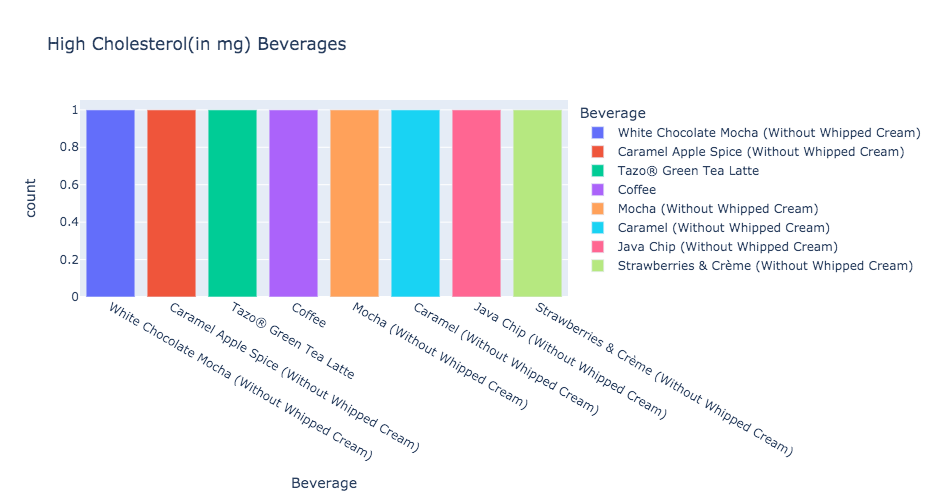

In [11]:
#Bar chart for Cholesterol
fig=px.bar(cholesterol_data, x='Beverage',height=500,hover_name= 'Cholesterol(mg)',title="High Cholesterol(in mg) Beverages",color ='Beverage')
fig.write_html("Cholesterol.html")
fig.show()

In [12]:
# Top Total Carbohydrate Beverage
carbs_group = nutri_data[(nutri_data['TotalCarbohydrates(g)'] >= 250)]
carbs_data = carbs_group[["Beverage","TotalCarbohydrates(g)"]]
carbs_data  = carbs_data .drop_duplicates(subset='Beverage', keep='first')
carbs_data

Beverage  TotalCarbohydrates(g)
81   White Chocolate Mocha (Without Whipped Cream)                    250
187                                         Coffee                    300
196                  Mocha (Without Whipped Cream)                    300
205                Caramel (Without Whipped Cream)                    290
211              Java Chip (Without Whipped Cream)                    250
222                                          Mocha                    280
225                                        Caramel                    270
228                                      Java Chip                    320
235   Strawberries & Crème (Without Whipped Cream)                    260

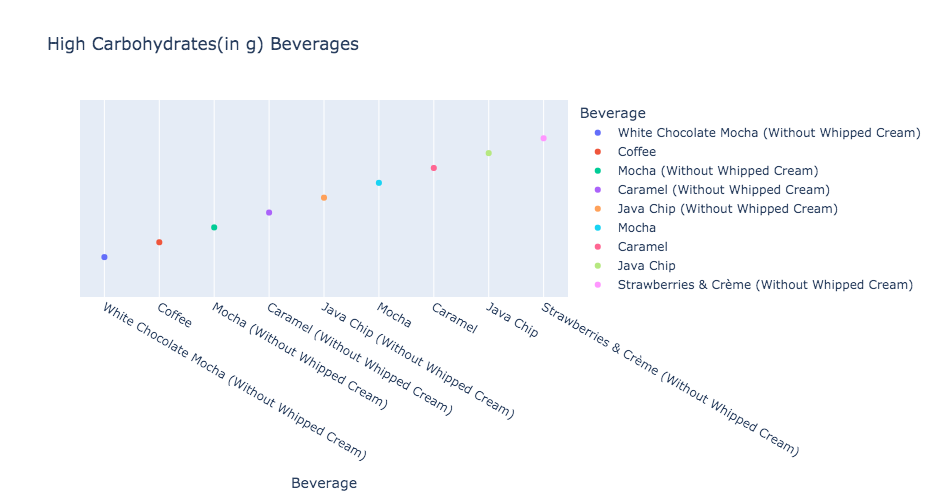

In [13]:
# Strip plot for Total Carbohydrates
fig=px.strip(carbs_data, x='Beverage',height=500,hover_name= 'TotalCarbohydrates(g)',title="High Carbohydrates(in g) Beverages",color ='Beverage')
fig.write_html("t-carbs.html")
fig.show()

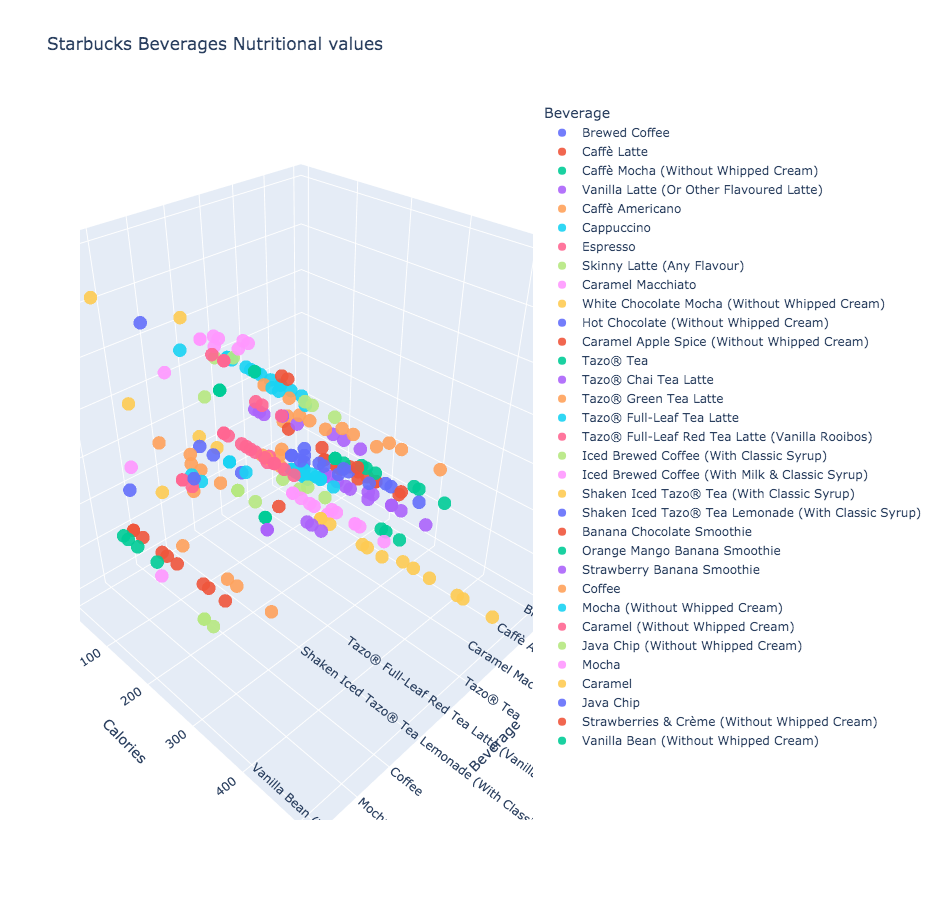

In [14]:
#Overall Calories and Caffeine value
nutri_group = nutri_data.groupby('Beverage')

fig = px.scatter_3d(nutri_data, x='Beverage', z='Caffeine(mg)', y='Calories',
              color='Beverage',opacity=0.9,size_max=25,height=900,width=1200,title="Starbucks Beverages Nutritional values")
fig.write_html("cal-caf.html")
fig.show()


In [15]:
# Cahnging Datatype for the column Calcium
nutri_data["Calcium(%DV)"] = pd.to_numeric(nutri_data["Calcium(%DV)"].apply(lambda x: float(x[:-1])))
nutri_data

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index           Beverage_category  \
0        0                      Coffee   
1        1                      Coffee   
2        2                      Coffee   
3        3                      Coffee   
4        4     Classic Espresso Drinks   
..     ...                         ...   
237    237  Frappuccino® Blended Crème   
238    238  Frappuccino® Blended Crème   
239    239  Frappuccino® Blended Crème   
240    240  Frappuccino® Blended Crème   
241    241  Frappuccino® Blended Crème   

                                         Beverage Beverage_prep    Size  \
0                                   Brewed Coffee         Short   Short   
1                                   Brewed Coffee          Tall    Tall   
2                                   Brewed Coffee        Grande  Grande   
3                                   Brewed Coffee         Venti   Venti   
4                                     Caffè Latte   Nonfat Milk   Short   
..                                            ...           ...     ...   
237  Strawberries & Crème (Without Whipped Cream)       Soymilk   Venti   
238          Vanilla Bean (Without Whipped Cream)   Nonfat Milk    Tall   
239          Vanilla Bean (Without Whipped Cream)    Whole Milk    Tall   
240          Vanilla Bean (Without Whipped Cream)       Soymilk    Tall   
241          Vanilla Bean (Without Whipped Cream)   Nonfat Milk  Grande   

     Calories TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
0           3         0.1          0.0              0.0           0   
1           4         0.1          0.0              0.0           0   
2           5         0.1          0.0              0.0           0   
3           5         0.1          0.0              0.0           0   
4          70         0.1          0.1              0.0           5   
..        ...         ...          ...              ...         ...   
237       320         3 2          0.4              0.0           0   
238       170         0.1          0.1              0.0           0   
239       200         3.5          2.0              0.1          10   
240       180         1.5          0.2              0.0           0   
241       240         0.1          0.1              0.0           5   

     TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  Sugars(g)  \
0                        5                0                0          0   
1                       10                0                0          0   
2                       10                0                0          0   
3                       10                0                0          0   
4                       75               10                0          9   
..                     ...              ...              ...        ...   
237                    250               67                1         64   
238                    160               39                0         38   
239                    160               39                0         38   
240                    160               37                1         35   
241                    230               56                0         55   

     Protein(g) VitaminA(%DV) VitaminC(%DV)  Calcium(%DV) Iron(%DV)  \
0           0.3            0%            0%           0.0        0%   
1           0.5            0%            0%           0.0        0%   
2           1.0            0%            0%           0.0        0%   
3           1.0            0%            0%           2.0        0%   
4           6.0           10%            0%          20.0        0%   
..          ...           ...           ...           ...       ...   
237         5.0            6%            8%          20.0       10%   
238         4.0            6%            0%          10.0        0%   
239         3.0            6%            0%          10.0        0%   
240         3.0            4%            0%          10.0        6%   
241         5.0            8%            0%          15.0       

In [16]:
#Filtering high calcium drink
high_cal=nutri_data[nutri_data['Calcium(%DV)']>=40.0]
high_cal = high_cal.drop_duplicates(subset='Beverage', keep='first')
high_cal

index          Beverage_category  \
10      10    Classic Espresso Drinks   
25      25    Classic Espresso Drinks   
37      37    Classic Espresso Drinks   
61      61    Classic Espresso Drinks   
71      71  Signature Espresso Drinks   
80      80  Signature Espresso Drinks   
92      92  Signature Espresso Drinks   
124    124           Tazo® Tea Drinks   

                                          Beverage Beverage_prep    Size  \
10                                     Caffè Latte   Nonfat Milk  Grande   
25             Caffè Mocha (Without Whipped Cream)   Nonfat Milk   Venti   
37        Vanilla Latte (Or Other Flavoured Latte)   Nonfat Milk   Venti   
61                      Skinny Latte (Any Flavour)   Nonfat Milk   Venti   
71                               Caramel Macchiato   Nonfat Milk   Venti   
80   White Chocolate Mocha (Without Whipped Cream)   Nonfat Milk  Grande   
92           Hot Chocolate (Without Whipped Cream)   Nonfat Milk  Grande   
124                          Tazo® Green Tea Latte   Nonfat Milk  Grande   

     Calories TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
10        130         0.3          0.2              0.0           5   
25        280           3          2.0              0.0          10   
37        250         0.3          0.2              0.0          10   
61        160         0.3          0.2              0.0          10   
71        240           1          1.0              0.0          10   
80        350           6          4.5              0.0          10   
92        240         2.5          1.5              0.0           5   
124       290         0.5          0.2              0.0          10   

     TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  Sugars(g)  \
10                     150               19                0         18   
25                     160               54                2         44   
37                     180               47                0         45   
61                     200               24                0         21   
71                     170               43                0         41   
80                     240               61                0         58   
92                     140               48                2         41   
124                    160               57                1         56   

     Protein(g) VitaminA(%DV) VitaminC(%DV)  Calcium(%DV) Iron(%DV)  \
10         13.0           20%            0%          40.0        0%   
25         17.0           25%            0%          45.0       30%   
37         15.0           25%            0%          50.0        0%   
61         15.0           25%            0%          50.0        0%   
71         13.0           25%            0%          40.0        0%   
80         15.0           20%            2%          45.0        2%   
92         14.0           20%            0%          40.0       25%   
124        14.0           25%           15%          45.0        4%   

    Caffeine(mg)  
10           150  
25           180  
37           150  
61           150  
71           150  
80           150  
92            25  
124           80

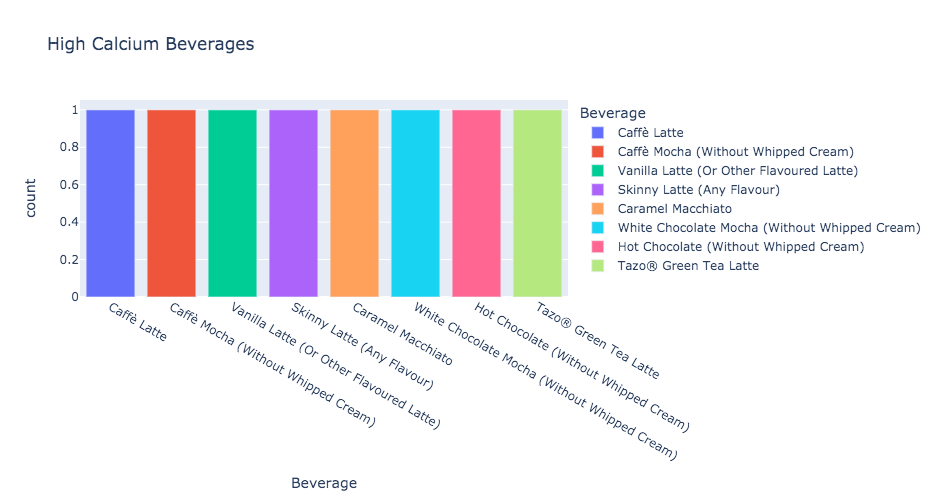

In [22]:
#Pie chart for High Calcium Beverage
# fig = px.pie(high_cal, values='Calcium(%DV)', names='Beverage',title="High Calcium Beverages")
# fig.update_traces(textinfo='value',pull=[0, 0, 0, 0.2])
# fig.write_html("calcium.html")
# fig.show()
fig=px.bar(high_cal, x='Beverage',height=500,hover_name= 'Calcium(%DV)',title="High Calcium Beverages",color ='Beverage')
fig.write_html("calcium.html",)
fig.show()




In [23]:
# Filtering high Protein drink
high_protein=nutri_data[nutri_data['Protein(g)']>=18]
high_protein = high_protein .drop_duplicates(subset='Beverage', keep='first')

high_protein

index          Beverage_category  \
83      83  Signature Espresso Drinks   
95      95  Signature Espresso Drinks   
127    127           Tazo® Tea Drinks   
172    172                  Smoothies   

                                          Beverage Beverage_prep    Size  \
83   White Chocolate Mocha (Without Whipped Cream)   Nonfat Milk   Venti   
95           Hot Chocolate (Without Whipped Cream)   Nonfat Milk   Venti   
127                          Tazo® Green Tea Latte   Nonfat Milk   Venti   
172                      Banana Chocolate Smoothie   Nonfat Milk  Grande   

     Calories TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
83        450           7          6.0              0.0          10   
95        320           3          2.0              0.0          10   
127       370         0.5          0.3              0.0          10   
172       280         2.5          1.5              0.0           5   

     TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  Sugars(g)  \
83                     310               78                0         74   
95                     180               63                2         55   
127                    200               73                2         71   
172                    150               53                7         34   

     Protein(g) VitaminA(%DV) VitaminC(%DV)  Calcium(%DV) Iron(%DV)  \
83         19.0           25%            2%          60.0        2%   
95         18.0           25%            0%          50.0       30%   
127        18.0           30%           20%          60.0        6%   
172        20.0           10%           15%          20.0        0%   

    Caffeine(mg)  
83           150  
95            30  
127          110  
172       Varies

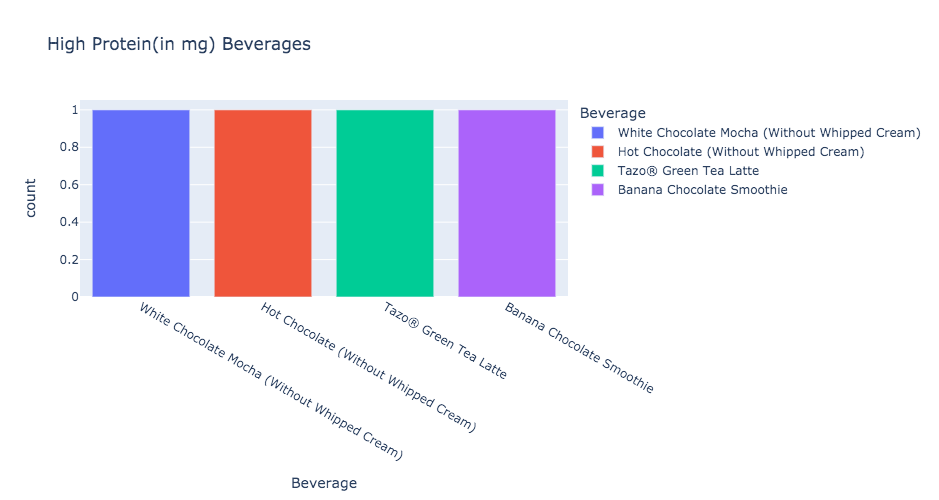

In [24]:
#Bar Cahrt for Protein drink

fig=px.bar(high_protein, x='Beverage',height=500,hover_name= 'Protein(g)',title="High Protein(in mg) Beverages",color ='Beverage')
fig.write_html("Protein.html",)
fig.show()

In [25]:
# High Cholesterol and Total Carbs
high_choles=nutri_data[(nutri_data['Cholesterol(mg)'] >= 70) & (nutri_data['TotalCarbohydrates(g)'] >= 300)]
carb_choles = high_choles[["Beverage","TotalCarbohydrates(g)","Cholesterol(mg)"]]
clean_carb_choles = carb_choles.drop_duplicates(subset='Beverage', keep='first')
clean_carb_choles

Beverage  TotalCarbohydrates(g)  \
83   White Chocolate Mocha (Without Whipped Cream)                    310   
187                                         Coffee                    300   
196                  Mocha (Without Whipped Cream)                    300   
206                Caramel (Without Whipped Cream)                    300   
214              Java Chip (Without Whipped Cream)                    340   

     Cholesterol(mg)  
83                78  
187               70  
196               80  
206               78  
214               90

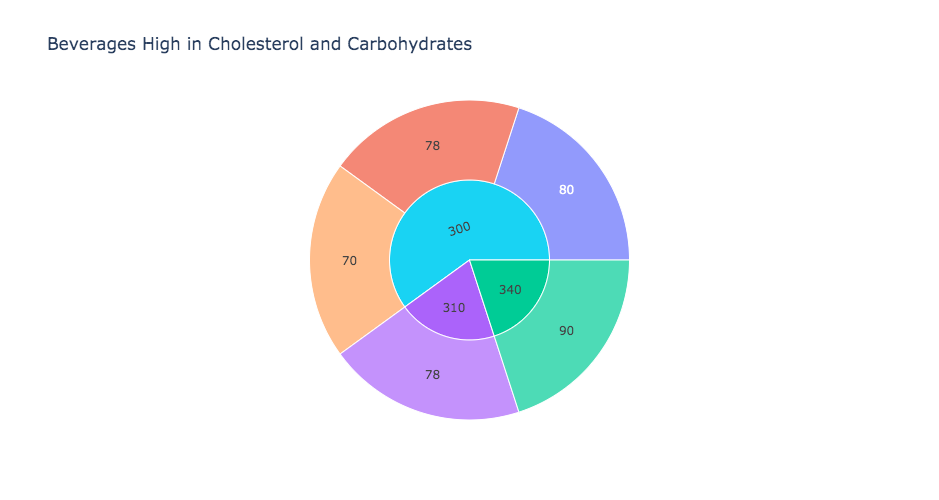

In [26]:
#Overall High Cholesterol and Totalcarbohydrates
fig = px.sunburst(clean_carb_choles,color='Beverage',title="Beverages High in Cholesterol and Carbohydrates",path=["TotalCarbohydrates(g)","Cholesterol(mg)"],hover_name="Beverage", height= 500)
fig.write_html("cal-choles.html")
fig.show()

In [21]:
#Overall non-nutritional Correlation values
corr_data = nutri_data[['Calories', 'TotalFat(g)','TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)', 'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)', 'Sugars(g)']]
corr_data

Calories TotalFat(g)  TransFat(g)  SaturatedFat(g)  Sodium(mg)  \
0            3         0.1          0.0              0.0           0   
1            4         0.1          0.0              0.0           0   
2            5         0.1          0.0              0.0           0   
3            5         0.1          0.0              0.0           0   
4           70         0.1          0.1              0.0           5   
...        ...         ...          ...              ...         ...   
2899       320         3 2          0.4              0.0           0   
2900       170         0.1          0.1              0.0           0   
2901       200         3.5          2.0              0.1          10   
2902       180         1.5          0.2              0.0           0   
2903       240         0.1          0.1              0.0           5   

      TotalCarbohydrates(g)  Cholesterol(mg)  DietaryFibre(g)  Sugars(g)  
0                         5                0                0          0  
1                        10                0                0          0  
2                        10                0                0          0  
3                        10                0                0          0  
4                        75               10                0          9  
...                     ...              ...              ...        ...  
2899                    250               67                1         64  
2900                    160               39                0         38  
2901                    160               39                0         38  
2902                    160               37                1         35  
2903                    230               56                0         55  

[2892 rows x 9 columns]

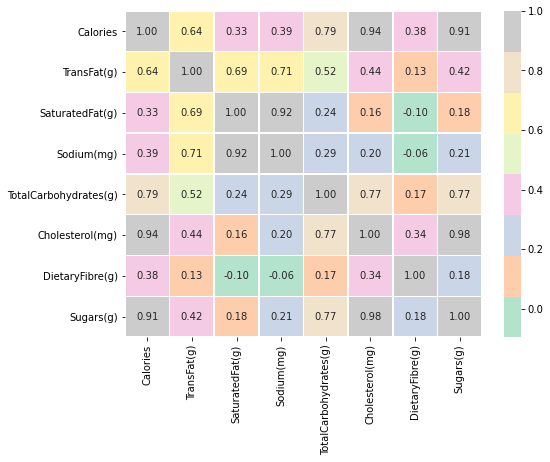

In [22]:
# shows that Cholestrol has a high correlation with Clories, Sugar and Total Carbs.
# Shows that Sodium has a high correlation with Saturated fat.

f,ax =plt.subplots(figsize=(8,6))
plt.xticks(rotation=60)
fig = sns.heatmap(corr_data.corr(),annot=True,linewidth =0.5,cmap = 'Pastel2',fmt ='.2f',ax=ax)
